# Proyecto 4. Parte 2
## Pamela Salazar

10. Entrene la red construida utilizando su conjunto de entrenamiento

In [1]:
import pandas as pd
import numpy as np
import random
import pickle
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPool2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.metrics import metrics 
from keras.losses import CategoricalCrossentropy
from sklearn import model_selection 


In [2]:
df1_train = pd.read_csv('train.csv')
df1_test = pd.read_csv('test.csv')


In [3]:
def writeSpectogram (specfile):
    with open(specfile, "rb") as f:
        S_dB = pickle.load(f)
    S_dB=S_dB.astype(np.float32)
    return S_dB

In [4]:
D_train=[]
for i in range(len(df1_train['Clase'])):
    classID = df1_train['Clase ID'][i] 
    path_spect = 'espectogramas' + '/' + df1_train['Path de espectograma'][i]
    spec = writeSpectogram(path_spect)
    spec =spec .astype(np.float32)
   
    D_train.append((spec,classID))

D_test=[]
for i in range(len(df1_test['Clase'])):
    classID = df1_test['Clase ID'][i] 
    path_spect = 'espectogramas' + '/' + df1_test['Path de espectograma'][i]
    spec = writeSpectogram(path_spect)
    spec =spec .astype(np.float32)
   
    D_test.append((spec,classID))


dataset_train=D_train
dataset_test=D_test
random.shuffle(dataset_train)
random.shuffle(dataset_test)
train=dataset_train
test=dataset_test
X_train, y_train = zip(*train)
X_test, y_test = zip(*test)
X_train = np.array([x.reshape( (40, 101, 1) ) for x in X_train])
X_test = np.array([x.reshape( (40, 101, 1) ) for x in X_test])
# Normalización
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
mean = np.mean(X_test, axis=0)
std = np.std(X_test, axis=0)
X_test = (X_test - mean)/std
y_train = np.array(np_utils.to_categorical(y_train, 12))
y_test = np.array(np_utils.to_categorical(y_test, 12))


In [5]:
# Construct model 
model = models.Sequential()
# model2 = models.Sequential()

# model
model.add(layers.Conv2D( input_shape=(40, 101, 1),filters=12, kernel_size=(3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation(activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
model.add(layers.Conv2D(filters=24, kernel_size=(3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation(activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
model.add(layers.Conv2D(filters=48, kernel_size=(3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation(activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3),strides=(2, 2), padding='same'))
model.add(layers.Conv2D(filters=48, kernel_size=(3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation(activation='relu'))
model.add(layers.Conv2D(filters=48, kernel_size=(3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation(activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(1, 13), strides=(1, 1), padding='same'))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(12, activation='softmax'))


model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 101, 12)       120       
                                                                 
 batch_normalization (BatchN  (None, 40, 101, 12)      48        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 40, 101, 12)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 51, 12)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 51, 24)        2616      
                                                                 
 batch_normalization_1 (Batc  (None, 20, 51, 24)       9

Compile and train the model

In [6]:
# model 1
model.compile(optimizer=Adam(learning_rate=3e-4),
              loss=CategoricalCrossentropy(),
              metrics=[metrics.CategoricalAccuracy(),
                       metrics.FalseNegatives()])

In [7]:
model.fit(X_train, y_train, epochs=25,batch_size=128)

Epoch 1/25
183/183 [==============================] - 92s 480ms/step - loss: 1.5378 - categorical_accuracy: 0.5059 - false_negatives: 14628.0000
Epoch 2/25
183/183 [==============================] - 78s 424ms/step - loss: 0.5648 - categorical_accuracy: 0.8157 - false_negatives: 5268.0000
Epoch 3/25
183/183 [==============================] - 77s 420ms/step - loss: 0.3737 - categorical_accuracy: 0.8825 - false_negatives: 3303.0000
Epoch 4/25
183/183 [==============================] - 79s 433ms/step - loss: 0.2883 - categorical_accuracy: 0.9065 - false_negatives: 2523.0000
Epoch 5/25
183/183 [==============================] - 84s 459ms/step - loss: 0.2462 - categorical_accuracy: 0.9236 - false_negatives: 2086.0000
Epoch 6/25
183/183 [==============================] - 78s 424ms/step - loss: 0.2074 - categorical_accuracy: 0.9360 - false_negatives: 1756.0000
Epoch 7/25
183/183 [==============================] - 79s 429ms/step - loss: 0.1693 - categorical_accuracy: 0.9465 - false_negatives: 1

In [8]:
model.save('model.h5')

In [9]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


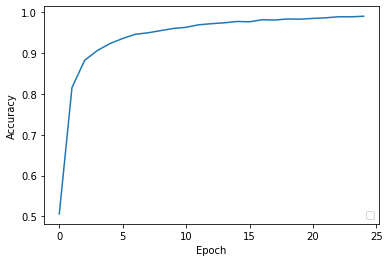

In [10]:
plt.plot(model.history.history['categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

No handles with labels found to put in legend.


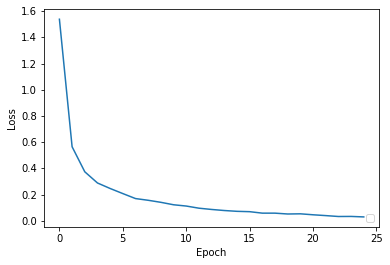

In [11]:
plt.plot(model.history.history['loss'], )
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

11. Evalue la red tanto en el conjunto de entrenamiento como en el de validacion

In [12]:
predictions = model.predict(X_train,batch_size=128)
decoded_y_train = y_train.argmax(axis=1)
decoded_predictions = predictions.argmax(axis=1)

183/183 [==============================] - 22s 116ms/step


In [13]:
from sklearn import metrics

In [14]:
print(metrics.classification_report(decoded_y_train,decoded_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2116
           1       1.00      0.97      0.98      2105
           2       0.99      1.00      0.99      2115
           3       1.00      0.98      0.99      2095
           4       0.96      1.00      0.98      2106
           5       1.00      0.97      0.99      2111
           6       1.00      0.95      0.97      2110
           7       0.95      1.00      0.97      2101
           8       1.00      1.00      1.00      2134
           9       0.97      1.00      0.98      2112
          10       0.99      1.00      0.99       205
          11       0.99      1.00      1.00      2000

    accuracy                           0.99     23310
   macro avg       0.99      0.99      0.99     23310
weighted avg       0.99      0.99      0.99     23310



In [15]:
matrix = metrics.confusion_matrix(decoded_y_train,decoded_predictions)
cm_dispaly = metrics.ConfusionMatrixDisplay(matrix)

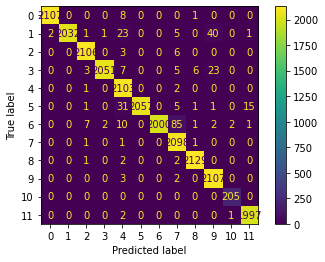

In [16]:
cm_dispaly.plot()
plt.show()

In [17]:
predictions = model.predict(X_test,batch_size=128)
decoded_y_test = y_test.argmax(axis=1)
decoded_predictions = predictions.argmax(axis=1)

30/30 [==============================] - 3s 103ms/step


In [18]:
print(metrics.classification_report(decoded_y_test,decoded_predictions))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       261
           1       0.96      0.86      0.91       270
           2       0.66      0.91      0.77       260
           3       0.76      0.87      0.81       264
           4       0.63      0.98      0.77       247
           5       0.84      0.90      0.87       256
           6       0.89      0.87      0.88       257
           7       0.64      0.97      0.77       256
           8       0.66      0.94      0.78       246
           9       0.66      0.92      0.77       260
          10       0.85      0.06      0.10       199
          11       0.96      0.54      0.69      1000

    accuracy                           0.77      3776
   macro avg       0.78      0.82      0.75      3776
weighted avg       0.82      0.77      0.75      3776



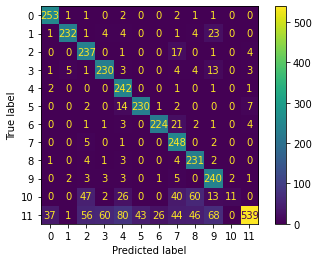

In [19]:
matrix = metrics.confusion_matrix(decoded_y_test,decoded_predictions)
cm_dispaly = metrics.ConfusionMatrixDisplay(matrix)
cm_dispaly.plot()
plt.show()